In [257]:
from matplotlib import pyplot as plt

import numpy as np

from fit.matrices.const_mats import create_p2d_mat
from fit.matrices.top_mats import create_top_mats
from fit.mesh.mesh import Mesh
from fit.plot.plot_field import plot_field
from fit.plot.plot_pot import plot_pot
from fit.solver.solve_poisson import solve_poisson

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [258]:
## Generate mesh
n = 50
nz = 5
xmesh = np.linspace(0, 1, n)
ymesh = np.linspace(0, 1, n)
zmesh = np.linspace(0, 1, nz)
msh = Mesh(xmesh, ymesh, zmesh)

In [259]:
## Set boundary conditions TODO: Update
V0 = 1

bc = np.full(msh.np, np.nan)
idx_bc_1 = []
idx_bc_2 = []

for i in range(int(n/2)):
    for k in range(nz):
        idx_bc_1.append(msh.idx(i, int(n/4), k))
        idx_bc_1.append(msh.idx(i+int(n/2), int(n/3), k))
        idx_bc_2.append(msh.idx(i, int(3*n/4), k))
        idx_bc_2.append(msh.idx(i+int(n/2), int(2*n/3), k))

bc[idx_bc_1] = 0
bc[idx_bc_2] = V0

In [260]:
## Current excitation TODO: Update
I0 = 1e7

g,_,_ = create_top_mats(msh)
i = np.zeros(3*msh.np)
# idx = [msh.idx(0, int(n/2 + i), np.arange(nz)) + 0*msh.np for i in np.linspace(-10, 10)]
# i[idx] = I0
q = -g.T @ i
# idx = [msh.idx(0, int(n/2 + i), np.arange(nz)) for i in np.linspace(-10, 10)]
# idx = msh.idx(int(n/2), int(n/2), np.arange(nz))
# q = np.zeros(msh.np)
# q[idx] = I0

In [261]:
## Solve system
eps = 8.854e-12
sig = 58e6
phi = solve_poisson(msh, q, sig, bc)

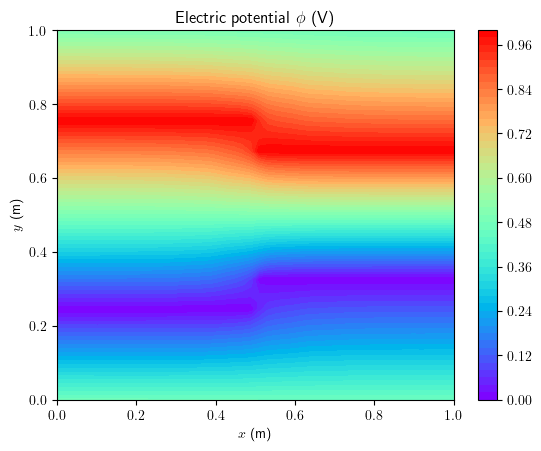

In [262]:
## Plot phi
plot_pot(msh, phi, nz=2, levels=n, cmap='rainbow', title='Electric potential $\phi$ (V)')

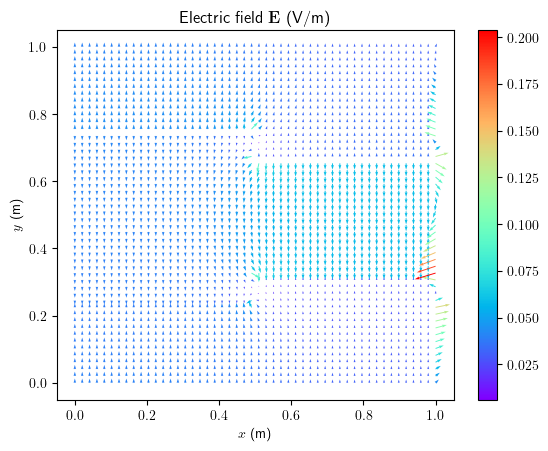

In [263]:
# Electrical field
m_sig = create_p2d_mat(msh, sig)    # Conductivity matrix
e = -g @ phi                        # e field
j = m_sig @ e                       # j field
plot_field(msh, e, nz=2, cmap='rainbow', title=r'Electric field $\mathbf{E}$ (V/m)')

In [264]:
## Power calculation
pe = e * j                          # Power on edge vector
pv = 0.5*np.abs(g.T) @ pe           # Power on dual volume vector

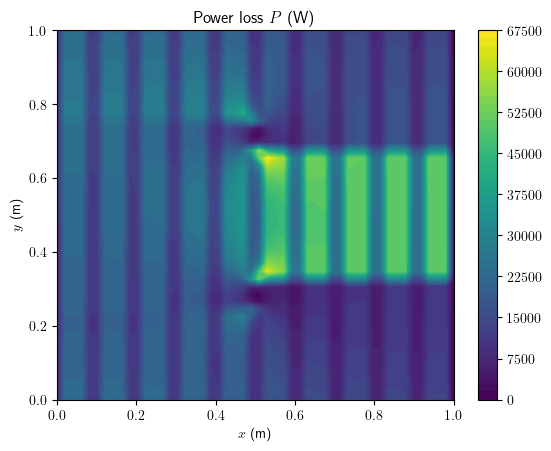

In [265]:
## Plot power
plot_pot(msh, pv, nz=2, levels=n, title='Power loss $P$ (W)')

In [266]:
## Solve thermal system
cond = 401
theta = solve_poisson(msh, pv, cond, bc)

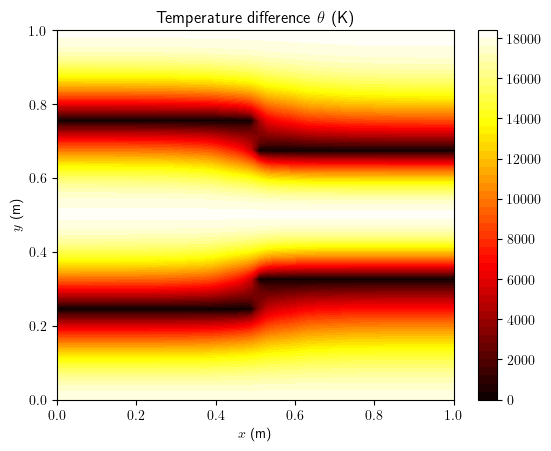

In [267]:
## Plot theta
plot_pot(msh, theta, nz=2, levels=n, cmap='hot', title=r'Temperature difference $\theta$ (K)')